<a href="https://colab.research.google.com/github/A01378065/fase-3-proyecto/blob/main/Copia_de_Soluci%C3%B3nNum%C3%A9ricaODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### Forward Eulero Method (Eulero explícito)

*Ecuación decaimiento radioactivo*

$N'(t)=-\alpha N(t)$

$y'(t)=f(t,y)$

La función $f$ es $f(t)=-\alpha N(t)$

Algoritmo Eulero explícito:

$y_{i+1}=y_i+y'_i dt$  con $y'(t)=f(t,y)$

$y_{i+1}=y_i+f(t,y)dt$

El paso $dt$ se indica frecuentemente con $h$:

$y_{i+1}=y_i+h\cdot f(t,y)$

$y_{i+1}=y_i-\alpha\cdot y  \cdot h$


In [ ]:
alpha = 0.25 # Coeficiente ley de decaimiento
t0 = 0.0     # Tiempo de inicio
tf = 5.0     # Tiempo final
h = 0.01     # Paso
N0 = 100     # Condición inicial

In [ ]:
nt = int((tf-t0)/h) #número de pasos
N = np.empty(nt+1)
N[0]=N0

for step in range(nt):
  N[step+1] = N[step]-alpha*N[step]*h

In [ ]:
h = 0.01
t0= 0
tf = 30


nt = int((tf-t0)/h) #número de pasos
Z = np.empty(nt+1)
Z[0]=20


G = np.empty(nt+1)
G[0]=20




a = 1
b = 0.02
c = 1
d = 0.01

for step in range(nt):
  X = a*Z[step] - b*Z[step]*G[step]
  Y = -1*c*G[step] + d*Z[step]*G[step]

  C= a*X - b*(X*G[step] + Z[step]*Y)
  J = -1*c*Y + d*(X*G[step] + Z[step]*Y)

  Z[step + 1] = Z[step] + h*X+0.5*h**2*C
  G[step + 1] = G[step] + h*Y+0.5*h**2*J






Los valores de la función aproximada son:

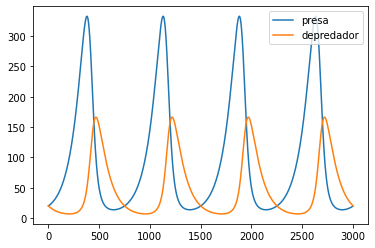

In [ ]:
plt.figure()
plt.plot(Z , label = 'presa')
plt.plot(G, label = "depredador")
plt.legend()

plt.show()

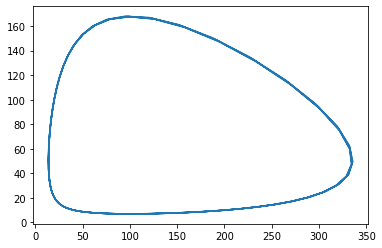

In [ ]:
plt.plot(Z,G)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

In [ ]:
alpha =  1 #mortality rate due to predators
beta = 0.02
delta = 1.
gamma = 0.01
x0 = 20.
y0 = 20.

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

In [ ]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

In [ ]:
(2, 1000)

(2, 1000)

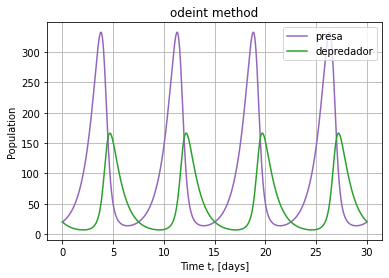

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'tab:purple', label = 'presa')
plt.plot(t, y, 'tab:green', label = "depredador")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

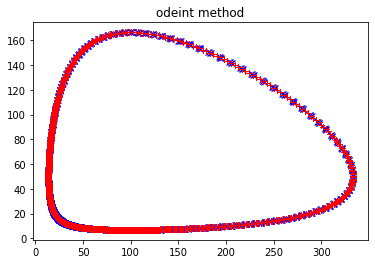

In [ ]:
plt.figure()
plt.title("odeint method")
plt.plot(x, y, 'xb', label = 'odeint')
plt.plot(Z, G, '+r',label = 'eules')

plt.show()

In [ ]:
def RK4(func, X0, t, alpha,  beta, delta, gamma):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., alpha,  beta, delta, gamma)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., alpha,  beta, delta, gamma)
        k4 = func(X[i] + dt    * k3, t[i] + dt, alpha,  beta, delta, gamma)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

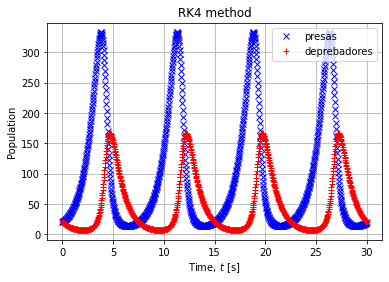

In [ ]:
Xrk4 = RK4(derivative, X0, t, alpha,  beta, delta, gamma)
plt.figure()
plt.title("RK4 method")
plt.plot(t, Xrk4[:, 0], 'xb', label = 'presas')
plt.plot(t, Xrk4[:, 1], '+r', label = "deprebadores")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

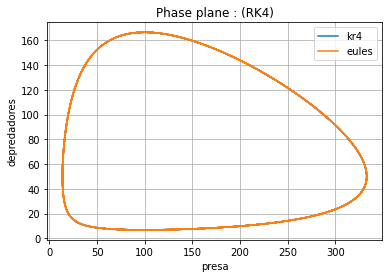

In [ ]:
plt.figure()

plt.plot(Xrk4[:, 0], Xrk4[:, 1], "-", label = 'kr4')
plt.xlabel("presa")
plt.ylabel("depredadores")
plt.grid()
plt.plot(Z, G,label = 'eules')
plt.legend(loc = "best")

plt.title("Phase plane : (RK4)");